In [1]:
d=read.csv("denguecases.csv")
head(d)
tail(d)

Month,Year,Region,Dengue_Cases
Jan,2008,Region.I,2.953926
Feb,2008,Region.I,2.183336
Mar,2008,Region.I,0.972410
Apr,2008,Region.I,9.357156
May,2008,Region.I,7.320599
Jun,2008,Region.I,4.513452


,Month,Year,Region,Dengue_Cases
1831,Jul,2016,NCR,7.982075
1832,Aug,2016,NCR,10.126983
1833,Sep,2016,NCR,9.900541
1834,Oct,2016,NCR,8.460119
1835,Nov,2016,NCR,7.541772
1836,Dec,2016,NCR,7.831114


In [2]:
library(forecast)
library(tseries)
library(ggplot2)


ERROR: Error in library(ggfortify): there is no package called ‘ggfortify’


In [3]:
install.packages("ggfortify")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Warning message:
“package ‘ggfortify’ is not available (for R version 3.4.4)”

In [4]:
#Aggregate regional data to represent the entire country
denguecasesph=aggregate(Dengue_Cases~Month+Year,d,sum)

head(denguecasesph)

Month,Year,Dengue_Cases
Apr,2008,131.13331
Aug,2008,159.97741
Dec,2008,93.65630
Feb,2008,49.38712
Jan,2008,79.85915
Jul,2008,152.63940


In [5]:
#Convert data into a time series
denguecasesphts=ts(denguecasesph$Dengue_Cases,c(2008,1),c(2016,12),12)

head(denguecasesphts)

           Jan       Feb       Mar       Apr       May       Jun
2008 131.13331 159.97741  93.65630  49.38712  79.85915 152.63940

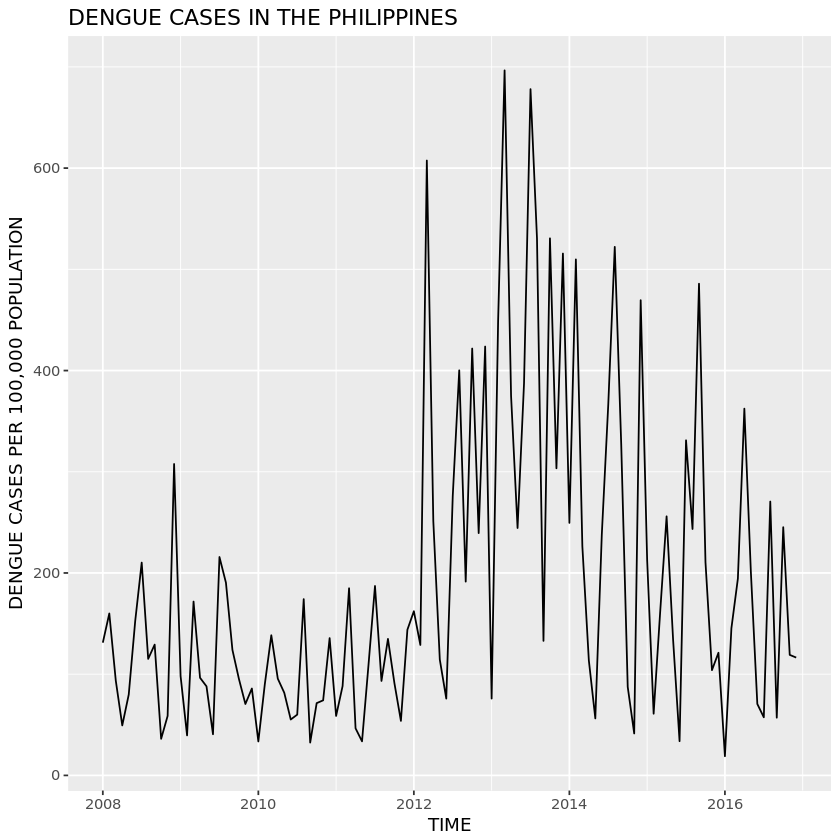

In [6]:
#Plot time series data
autoplot(denguecasesphts)+xlab(label = "TIME")+
  ylab(label = "DENGUE CASES PER 100,000 POPULATION")+
  ggtitle("DENGUE CASES IN THE PHILIPPINES")


In [7]:
#Test Stationarity of Time Series data
adf.test((denguecasesphts))

#Check the number of lag/s differencing needed to stationarize time series
ndiffs(denguecasesphts)


	Augmented Dickey-Fuller Test

data:  (denguecasesphts)
Dickey-Fuller = -2.0782, Lag order = 4, p-value = 0.5442
alternative hypothesis: stationary


[1] 1

Warning message in adf.test((denguecasesphtsdiff)):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  (denguecasesphtsdiff)
Dickey-Fuller = -7.4742, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


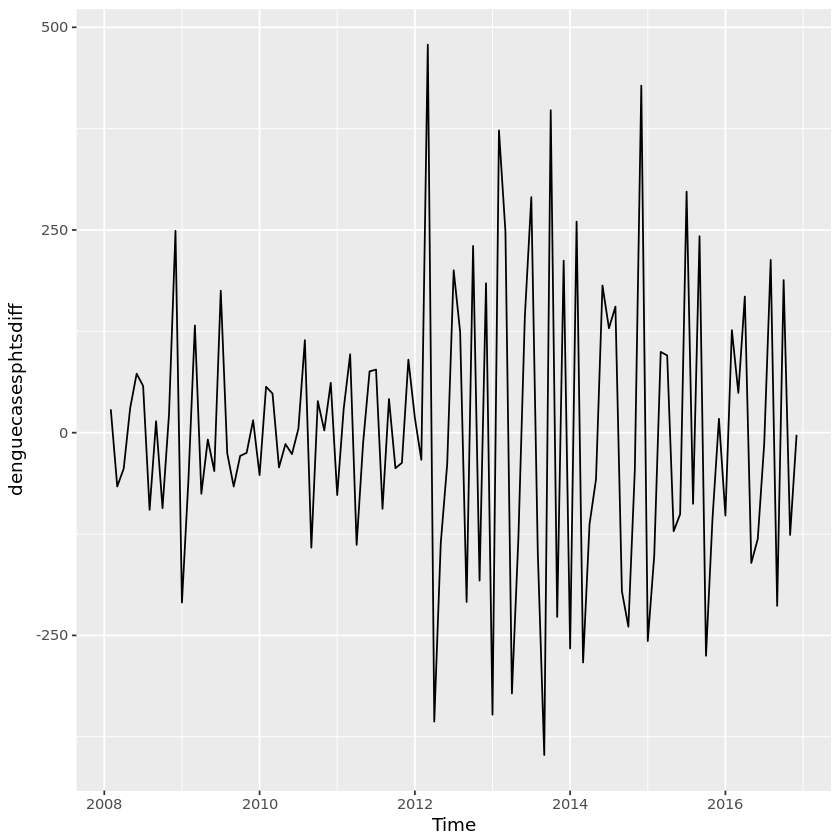

In [8]:
#Perform lag 1 differencing
denguecasesphtsdiff = diff(denguecasesphts)
#Plot differenced data
autoplot(denguecasesphtsdiff)

adf.test((denguecasesphtsdiff))


In [9]:
## automatic arima
d_arima = auto.arima(denguecasesphts)
d_arima


Series: denguecasesphts 
ARIMA(0,1,1)(0,0,1)[12] 

Coefficients:
          ma1    sma1
      -0.8234  0.3703
s.e.   0.0504  0.1004

sigma^2 estimated as 16200:  log likelihood=-670.8
AIC=1347.59   AICc=1347.82   BIC=1355.61

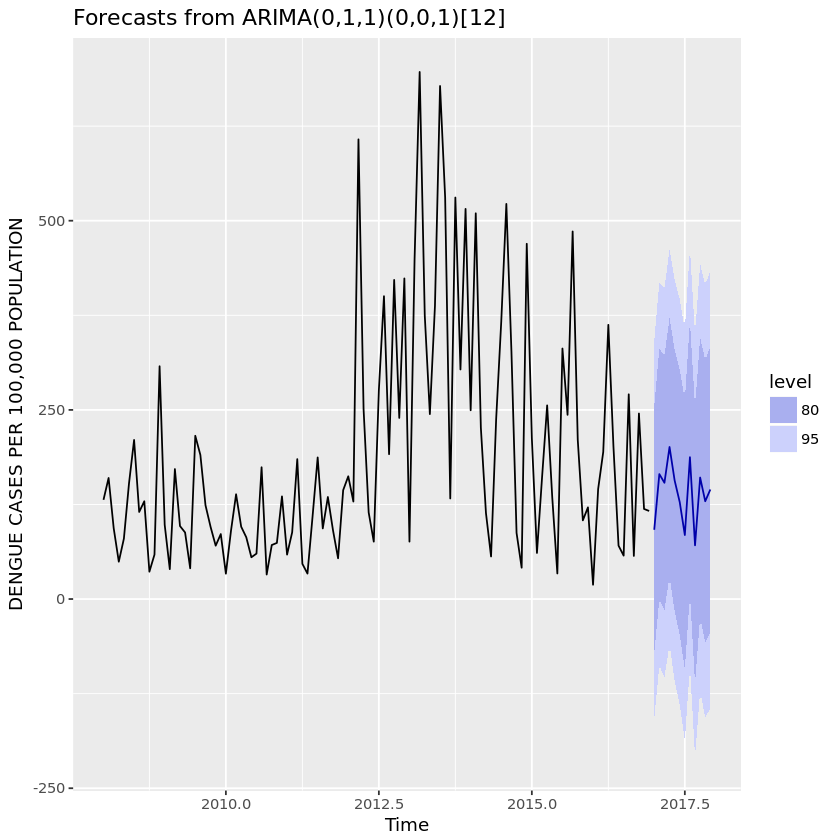

In [10]:

##It recommended an autoregressive function of lag 3 (p),
##with lag 1 differencing (d), and moving amerage model of lag 3.
## The seasonal model has autoregressive term of lag 2. 
##We did not use the differenced data but the actual dataset instead 
##to demonstrate that the auto.arima() function has successfully identified the number of lag differencing needed to stationarize our data.

#Make forecast for 2017
dengueph_forecast = forecast(d_arima,12)
#Plot forecast
autoplot(dengueph_forecast)+
  ylab(label = "DENGUE CASES PER 100,000 POPULATION")
